In [1]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt

In [61]:

def squared_loss(y_pred, y):
    loss = y_pred - y
    loss = np.multiply(loss, loss)
    if loss.ndim > 1:
        loss = np.sum(loss, axis=-1)
    return loss

def logistic_loss(y_pred, y):
    assert y_pred.ndim == 1
    loss = - (y*np.log(y_pred) + (1 - y) * np.log(1 - y_pred) )
    return loss

def hinge_loss(y_pred, y):
    loss = 1 - y_pred * y
    print(loss.shape)
    if loss.ndim > 1:
        loss = np.sum(loss, axis=-1)
    loss = np.clip(loss, 0, np.finfo(loss.dtype).max)
    return loss

def zero_one_loss(y_pred, y):
    loss = np.logical_not(np.isclose(y_pred, y, atol=1e-2)).astype(y.dtype)
    if loss.ndim > 1:
        loss = np.sum(loss, axis=-1)
    return loss

# One dimension (suits classification)

In [62]:
mesh = np.meshgrid(np.linspace(0, 2))[0]
origin=np.array([1])
loss_square = squared_loss(mesh, origin)
loss_logistic = logistic_loss(mesh, origin)
loss_hinge = hinge_loss(mesh, origin)
loss_zero_one = zero_one_loss(mesh, origin)

(50,)


/tmp/ipykernel_5599/652363451.py:10: RuntimeWarning: divide by zero encountered in log
  loss = - (y*np.log(y_pred) + (1 - y) * np.log(1 - y_pred) )
/tmp/ipykernel_5599/652363451.py:10: RuntimeWarning: invalid value encountered in log
  loss = - (y*np.log(y_pred) + (1 - y) * np.log(1 - y_pred) )


In [63]:
print(loss_zero_one)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


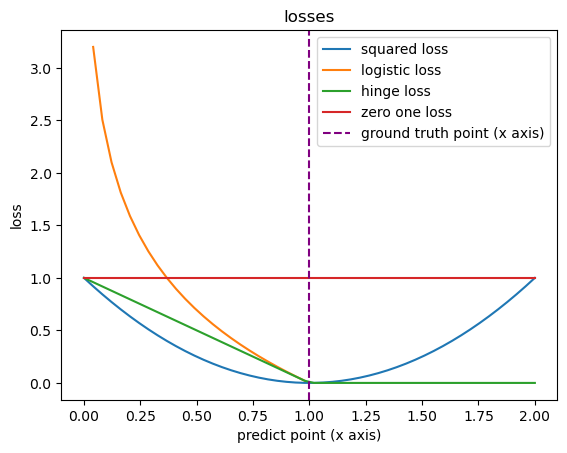

In [72]:
plt.plot(mesh, loss_square, label='squared loss')
plt.plot(mesh, loss_logistic, label='logistic loss')
plt.plot(mesh, loss_hinge, label='hinge loss')
plt.plot(mesh, loss_zero_one, label='zero one loss')
plt.axvline(origin, color='purple', linestyle='--', label='ground truth point (x axis)')


plt.xlabel('predict point (x axis)')
plt.ylabel('loss')
plt.title('losses')
plt.legend()

# 3D (doesn't suits classification)